# Project on Imbalanced Data for detecting Fradulant Online Transactions!!!
# Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
data = pd.read_csv(r'data.csv')
data.head(10)

,COL_1,COL_2,COL_3,COL_4,COL_5,COL_6,COL_7,COL_8,COL_9,COL_10,...,COL_26,COL_27,COL_28,COL_29,COL_30,COL_31,COL_32,COL_33,Quantity,Target
0,-1.171910,7.848397,93.521312,1.392288531,66.417154,0.000000,-5.301708,13.705543,41.076645,-6.058063,...,38.573425,-10.554010,10.641489,57.119862,1.136824,4.636065,10.342069,69.850213,6.008098746,0
1,9.523054,6.500050,-17.752853,0.666903172,34.722696,4.958577,11.771209,45.448412,5.213907,3.962270,...,23.652576,33.680394,49.996511,32.181979,1.017839,88.224999,-7.888449,48.017713,1.989541194,0
2,-30.507817,-35.844867,42.460668,1.780247381,58.090934,0.000000,23.236586,123.926586,42.987727,18.778323,...,-42.635379,-15.867116,-16.993190,-54.414452,1.612964,-53.341829,14.348167,-11.002013,6.936638705,0
3,-63.899072,-66.961934,-28.531696,1.51987552,-27.422829,0.000000,-38.087304,37.111229,33.324104,8.959495,...,-13.044841,-56.311194,-28.054077,-83.399777,0.127208,-78.005307,5.853169,38.401735,5.816241156,0
4,29.528048,-2.859712,35.596559,1.152610914,51.241258,0.000000,-2.432167,10.749448,37.257440,-6.600826,...,38.846838,44.233910,49.247931,73.794600,0.687138,68.812474,48.646178,44.860393,5.248352375,0
5,14.562661,21.817317,-9.490904,0.772502926,34.218213,0.028861,8.751678,28.070274,11.506764,-0.006719,...,-7.865072,47.329933,20.718191,13.249720,0.472763,30.007606,16.876571,43.047922,2.300191662,0
6,2.445892,-26.536123,56.650089,0.869548634,18.243169,0.000000,-4.533098,-33.632171,20.086202,5.613019,...,26.623156,-72.160426,-9.254540,21.378883,1.626588,-3.348239,-3.551060,37.765886,2.60743591,0
7,49.122507,-19.847532,-79.696543,1.591053074,-30.673861,0.000000,47.119372,20.098942,56.988966,16.177169,...,-39.591043,106.987074,3.484422,22.560831,2.121281,20.310920,38.768448,1.969015,4.708682081,0
8,132.369097,31.028436,32.503476,0.932415383,-10.477366,0.000000,40.119018,46.531943,-19.432764,47.934089,...,46.719850,-34.626365,-0.601883,-31.351271,1.164802,-11.157458,109.048398,-20.634282,5.534747722,0
9,21.071173,12.513925,-34.652982,1.292123478,35.425980,0.000000,9.471803,29.397205,22.941783,-17.335637,...,10.820380,71.798435,52.231375,40.099718,2.463379,78.763671,20.420514,66.790542,2.302912752,0


In [2]:
data.describe()

,COL_1,COL_2,COL_3,COL_5,COL_6,COL_7,COL_8,COL_9,COL_10,COL_11,...,COL_25,COL_26,COL_27,COL_28,COL_29,COL_30,COL_31,COL_32,COL_33,Target
count,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,284807.000000,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,-3.765495e-08,5.117893e-08,0.000002,1.029924e-07,1.242875,-5.086306e-07,1.863828e-07,-8.452735e-07,-1.770398e-07,1.299823e-07,...,1.276871e-07,0.000003,-2.553814e-07,0.498862,-0.000005,1.403103,2.402317,-0.000004,-0.000005,0.001727
std,6.826092e+01,5.268134e+01,59.985872,6.673227e+01,3.179767,4.937996e+01,5.976847e+01,3.972766e+01,5.620735e+01,5.003621e+01,...,5.772658e+01,59.086212,4.989501e+01,51.209414,63.798222,0.865594,77.088517,54.032378,62.066016,0.041527
min,-2.343794e+03,-1.105681e+03,-1667.565100,-2.858884e+03,0.000000,-1.389340e+03,-2.160762e+03,-1.616302e+03,-2.309702e+03,-1.269448e+03,...,-6.923148e+02,-1861.137989,-1.232053e+03,-1342.469227,-1928.207356,-0.099986,-2128.509903,-902.929801,-2455.247415,0.000000
25%,-3.023132e+01,-2.738215e+01,-28.497688,-2.521911e+01,0.000000,-2.651937e+01,-2.791230e+01,-1.809421e+01,-1.594229e+01,-2.601255e+01,...,-3.558644e+01,-22.780763,-3.116633e+01,-21.345829,-32.563673,0.655287,-33.087944,-30.381704,-27.946036,0.000000
50%,1.546979e+00,2.992826e+00,2.336904,9.035207e+00,0.000000,-6.944457e-01,2.383864e+00,3.911213e+00,4.636817e+00,7.682701e-03,...,-2.235023e+00,11.068680,4.772275e-01,7.028924,9.086922,1.401301,10.719806,-2.346270,4.737534,0.000000
75%,3.167147e+01,2.837504e+01,32.560453,3.632043e+01,0.058381,2.386864e+01,3.214180e+01,2.182633e+01,2.492407e+01,2.815538e+01,...,3.175607e+01,34.114771,3.061971e+01,31.196418,41.868174,2.153051,50.730176,26.130450,35.942482,0.000000
max,3.994007e+02,7.763747e+02,2598.490594,2.870480e+02,13.298076,5.653825e+02,1.613550e+03,3.733965e+02,5.409829e+02,7.264134e+02,...,1.808420e+03,281.458783,1.911104e+03,696.460312,677.354113,2.899982,216.219432,542.375888,290.485111,1.000000


# Data Cleaning

Checking for NaN in the data

In [3]:
data.isna().sum()

COL_1       0
COL_2       0
COL_3       0
COL_4       0
COL_5       0
COL_6       0
COL_7       0
COL_8       0
COL_9       0
COL_10      0
COL_11      0
COL_12      0
COL_13      0
COL_14      0
COL_15      0
COL_16      0
COL_17      0
COL_18      0
COL_19      0
COL_20      0
COL_21      0
COL_22      0
COL_23      0
COL_24      0
COL_25      0
COL_26      0
COL_27      0
COL_28      0
COL_29      0
COL_30      0
COL_31      0
COL_32      0
COL_33      0
Quantity    0
Target      0
dtype: int64

Checking for Null in data

In [4]:
data.isnull().sum().sum()

0

Checking for the datatypes of the columns in the dataframe

In [5]:
data.dtypes

COL_1       float64
COL_2       float64
COL_3       float64
COL_4        object
COL_5       float64
COL_6       float64
COL_7       float64
COL_8       float64
COL_9       float64
COL_10      float64
COL_11      float64
COL_12      float64
COL_13      float64
COL_14      float64
COL_15      float64
COL_16      float64
COL_17      float64
COL_18      float64
COL_19      float64
COL_20      float64
COL_21      float64
COL_22      float64
COL_23      float64
COL_24      float64
COL_25      float64
COL_26      float64
COL_27      float64
COL_28      float64
COL_29      float64
COL_30      float64
COL_31      float64
COL_32      float64
COL_33      float64
Quantity     object
Target        int64
dtype: object

In [6]:
data['COL_4'].value_counts(ascending=True)

1.872015944       1
1.378645209       1
1.288640935       1
1.390094947       1
1.63434472        1
               ... 
0.928565645       2
0.995132117       2
0.969482438       2
0.758637599       2
#NUM!          3230
Name: COL_4, Length: 281537, dtype: int64

COL_4 and Quantity has #NUM!. Need to replace them with NaN and convert the column datatype to float64.Since we are replacing a string, need regex=True

In [7]:
data['COL_4'] = data['COL_4'].replace('#NUM!',np.nan, regex = True)

In [8]:
data=data.astype({'COL_4':'float64'})

In [9]:
data['Quantity'] = data['Quantity'].replace('#NUM!',np.nan, regex = True)

In [10]:
data=data.astype({'Quantity':'float64'})

# Using the Simple Imputer to impute missing values i.e NaN

In [11]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr.fit(data[['COL_4']])
data['COL_4'] = imr.transform(data[['COL_4']])
data['Quantity'] = imr.transform(data[['Quantity']])

Checking for NaN values

In [12]:
data.isna().sum()

COL_1       0
COL_2       0
COL_3       0
COL_4       0
COL_5       0
COL_6       0
COL_7       0
COL_8       0
COL_9       0
COL_10      0
COL_11      0
COL_12      0
COL_13      0
COL_14      0
COL_15      0
COL_16      0
COL_17      0
COL_18      0
COL_19      0
COL_20      0
COL_21      0
COL_22      0
COL_23      0
COL_24      0
COL_25      0
COL_26      0
COL_27      0
COL_28      0
COL_29      0
COL_30      0
COL_31      0
COL_32      0
COL_33      0
Quantity    0
Target      0
dtype: int64

In [13]:
data.dtypes

COL_1       float64
COL_2       float64
COL_3       float64
COL_4       float64
COL_5       float64
COL_6       float64
COL_7       float64
COL_8       float64
COL_9       float64
COL_10      float64
COL_11      float64
COL_12      float64
COL_13      float64
COL_14      float64
COL_15      float64
COL_16      float64
COL_17      float64
COL_18      float64
COL_19      float64
COL_20      float64
COL_21      float64
COL_22      float64
COL_23      float64
COL_24      float64
COL_25      float64
COL_26      float64
COL_27      float64
COL_28      float64
COL_29      float64
COL_30      float64
COL_31      float64
COL_32      float64
COL_33      float64
Quantity    float64
Target        int64
dtype: object

# Plotting histograms for all columns

/Users/keerthiseetha/villanova/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """


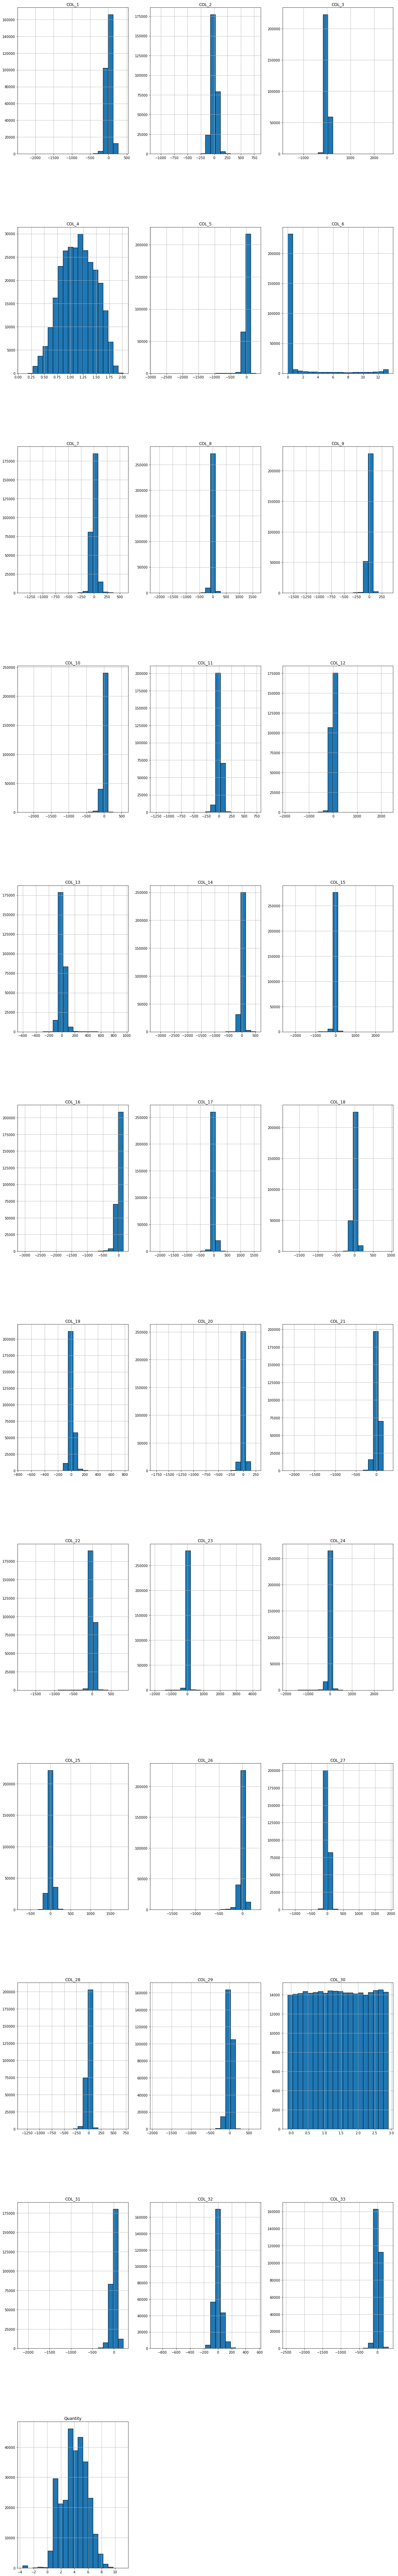

In [14]:
columns=data.columns[:-1]
plt.subplots(figsize=(20,200))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

The Quantity column has outliers which are ngative values (i.e <0). There are a considerable number of outliers of the value -3.605170186, few of which have the TARGET value as 1. Therefore, choosing to replace the value rather than removing the rows

In [15]:
#using RANDOM to generate a random number
import random
n = random.random()
display(n)

0.5602098991947237

<AxesSubplot:>

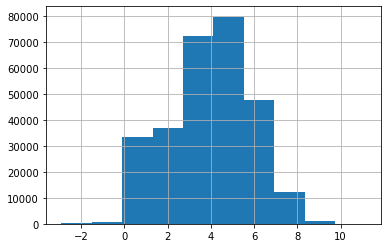

In [16]:
data['Quantity']=data['Quantity'].replace(-3.605170186,n,regex=True)
data['Quantity'].hist()

In [17]:
data['Quantity'].isnull().sum()

0

# Correlation Map 
To find the correlation between the columns

In [18]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

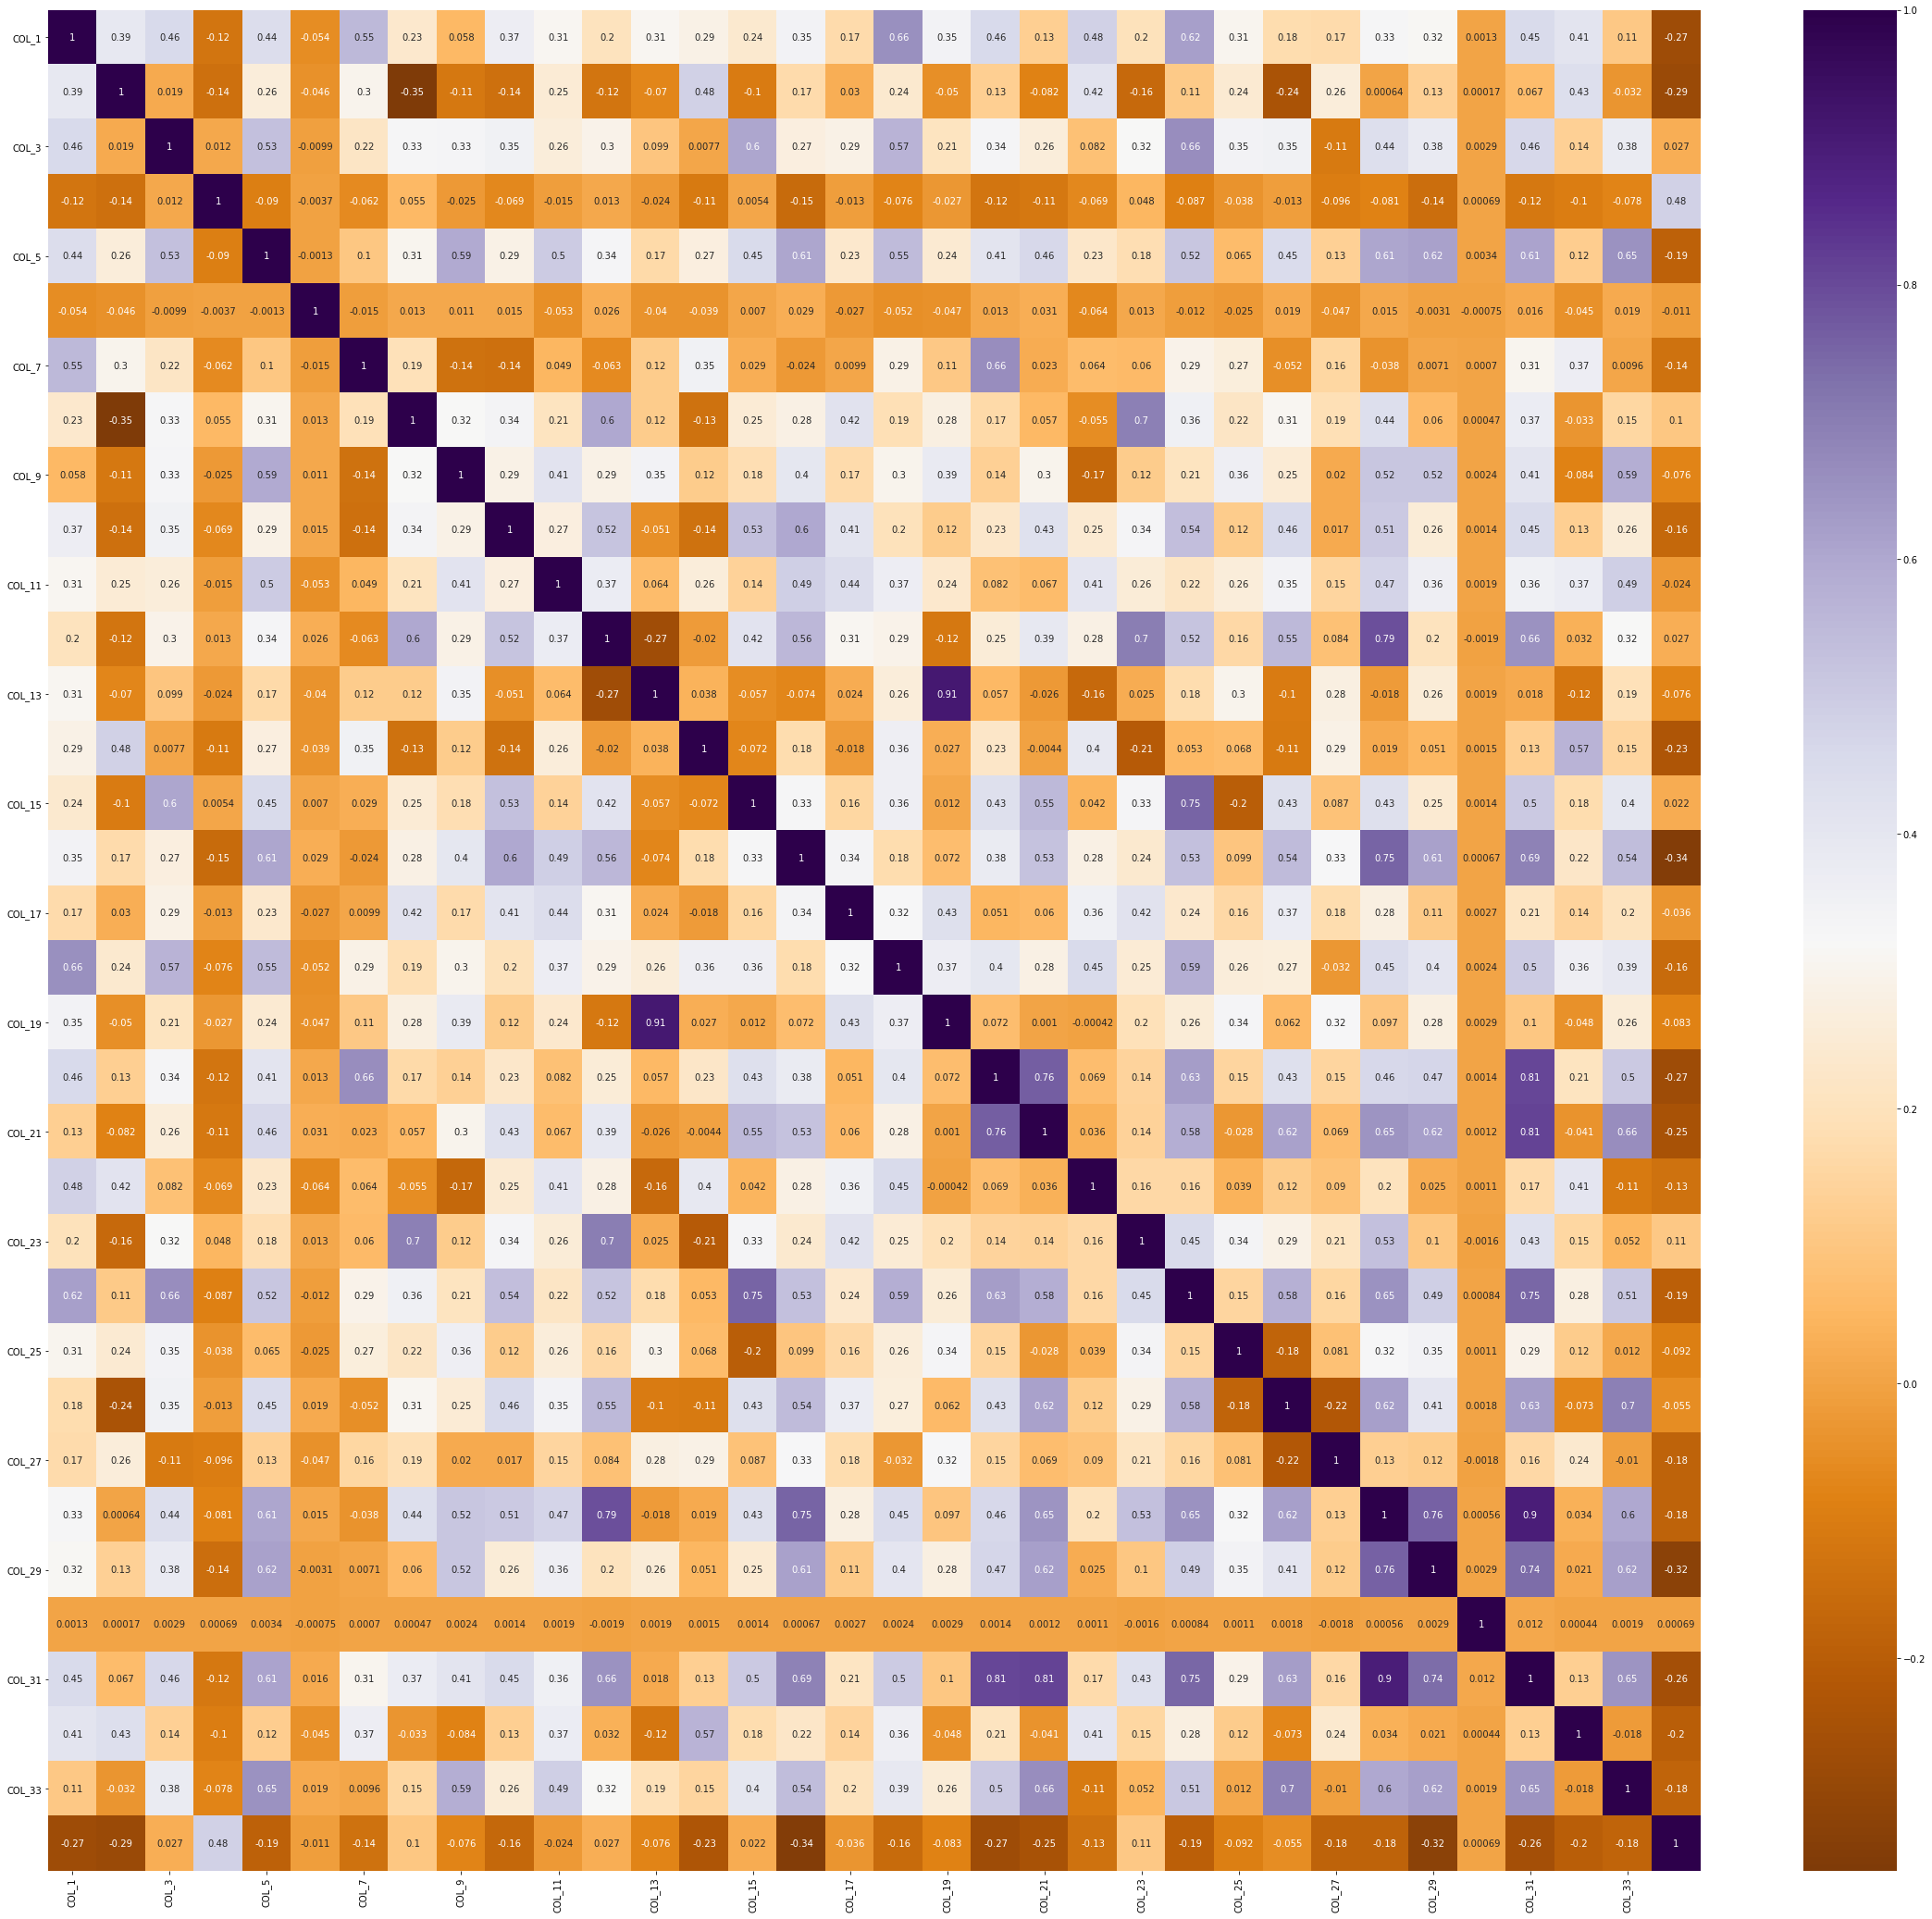

In [19]:
sns.heatmap(data[data.columns[:34]].corr(),annot=True,cmap='PuOr')
fig=plt.gcf()
fig.set_size_inches(40,37)
plt.show()

In [20]:
# Setting the threshold as 0.70.
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
display(to_drop)

['COL_19', 'COL_21', 'COL_23', 'COL_24', 'COL_28', 'COL_29', 'COL_31']

In [21]:
#to_drop has the names of the columns which have correlation values >0.70 with other columns.
#High relations depicts redundancy.
#drop the columns 
data.drop(to_drop, axis=1, inplace=True)

In [22]:
data.shape

(284807, 28)

Variance of all columns

In [23]:
data.var()

COL_1       4659.553396
COL_2       2775.323135
COL_3       3598.304824
COL_4          0.110046
COL_5       4453.195854
COL_6         10.110917
COL_7       2438.380612
COL_8       3572.270144
COL_9       1578.286992
COL_10      3159.266261
COL_11      2503.622267
COL_12      4638.527132
COL_13      1978.739979
COL_14      2670.107417
COL_15      3985.151109
COL_16      4694.406889
COL_17      3638.363052
COL_18      3396.866080
COL_20      1464.407727
COL_22      2830.595083
COL_25      3332.358584
COL_26      3491.180469
COL_27      2489.511890
COL_30         0.749252
COL_32      2919.497889
COL_33      3852.190306
Quantity       3.410694
Target         0.001725
dtype: float64

# What is important to predict?

In the given dataset, we have a huge set of records which are classified as fraudulent and non-fraudulent transactions.
When the value of the TARGET column is 0, it depicts that the row belongs to a non-fraudulent transaction. When the value is 1, it points to the fraud transaction. Majority of the records have the TARGET as 0, therefore the majority class would point out to the non-fraudulent transactions. That will be taken as NEGATIVE
Whereas the minority class have the TARGET as 1, which would be the POSITIVE

TP- predicting fraud as fraud

FP-predicint non-fraud as fraud

TN- predicting non-fraud as non-fraud

FN-predicting fraud as non-fraud

It is very important to predict the fraud transactions. In such scenario, identifying non-fraudulent transactions as fraud (FP) and following up with it is better than claiming fraudulent transactions as non-fraud(FN).
The cost of claiming Fraudulent transactions as non -fraud (FN) is very high.
Whereas the cost of claiming non-fraudulent transactions as fraud(FP), could be an inconvenience but, not necessarily bad. Since, further investigation into the transaction would eventually show proof that it is a genuine transaction and would be left off the hook.


# What Metric(s) would make sense to evaluate ML model

Accuracy- based on the predictions of the majority data

Precision- correctly predicted positive / total positive.
Emphasis on false positive. Not concerned with False negatives

Recall – correctly predicted positive / all positives that could be predicted.Emphasis on False Negatives.Fase negatives drop Recall.
Max Precision, minimizes FP. Max Recall minimizes FN

F-Measure balances recall and precision.
As beta increases, weight on recall increases

Mathews Correaltion Coeff – The above statistical measures can dangerously show overoptimistic inflated results, especially on imbalanced datasets.
MCC is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories.
High score only if the binary predictor was able to correctly predict the majority of positive data instances and the majority of negative data instances

With our dataset, we need to lay more emphasis on the reduction of False Negatives there fore we need a high recall. Along with that, the next priority would be the false positive(Precision). Therefore, we need a balance of Precision and recall with more emphasis on the Recall. We will use the F measure
With the beta values, the emphasis on recall and precisoin varies.Therefore we use F-2

# Splitting the Data and Random Forest


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score
X=data.copy()
y=data['Target']
X.drop('Target',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state = 0) 

from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
rfc_model.fit(X_train, y_train)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.4s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=0,
                       verbose=1)

In [25]:
y_rf = rfc_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [26]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_rf, average="binary")) 

0.7398373983739838


In [27]:
for i in range(1,9):
    print('F:',i)
    print(fbeta_score(y_test,y_rf,beta=i))

F: 1
0.834862385321101
F: 2
0.7751277683134584
F: 3
0.757071547420965
F: 4
0.7498788172564227
F: 5
0.7463722397476342
F: 6
0.7444174220650009
F: 7
0.7432211695524338
F: 8
0.7424375549140204


In [28]:
from sklearn import metrics
metrics.matthews_corrcoef(y_test,y_rf)

0.8416053251662807

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_rf)
display(cm)

array([[71075,     4],
       [   32,    91]])

In [30]:
#Finding the feature importances
dat_1=data.copy()
dat_1 = dat_1.drop(['Target'],1)
features = dat_1.columns
imp=rfc_model.feature_importances_
data_tuple = list(zip(features, imp))
df_features = pd.DataFrame(data_tuple, columns = ['Features', 'Weight'])
sorted_features = df_features.sort_values(by = ['Weight'], ascending = False)

In [31]:
sorted_features.head(15)

,Features,Weight
7,COL_8,0.215242
17,COL_18,0.113857
20,COL_25,0.067363
1,COL_2,0.066195
16,COL_17,0.057782
6,COL_7,0.036995
18,COL_20,0.034664
12,COL_13,0.032626
19,COL_22,0.032463
11,COL_12,0.030077


# Scaling the Data and PCA

In [32]:
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(Scaled_X)

PCA(n_components=0.99)

In [33]:
print(pca.explained_variance_)

[6.54451592 3.45080035 2.07265721 1.78586021 1.75929096 1.48036044
 1.22654417 1.06068221 0.99997909 0.97532133 0.90388004 0.77149503
 0.71902284 0.66300914 0.51959177 0.47467216 0.37668457 0.30994904
 0.25204938 0.21236111 0.14849699 0.12128541]


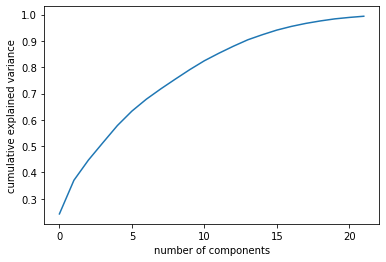

In [34]:
ca = PCA().fit_transform(Scaled_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As per the plot, we need a minimum of 15 features to obtain optimal Targets

# Creating  Dataframe for the PCA components

In [35]:
pc_df=pd.DataFrame(data=ca,columns=['PCA1','PCA2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27'])

In [36]:
pc_df['Target']=data['Target']

Dataframe containing all Fraud Transaction

In [37]:
fnf_df=pc_df[pc_df['Target']==1]

Dataframe containing non-fraud 1000 transactions

In [38]:
non_fraud=pc_df[pc_df['Target']==0].head(1000)

Final Dataframe to for scatter Plot

In [39]:
fnf_df=fnf_df.append(non_fraud)

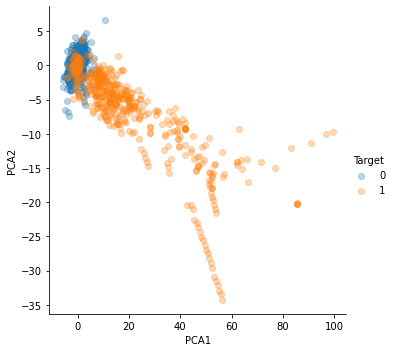

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot( x="PCA1", y="PCA2",
  data=fnf_df, 
  fit_reg=False, 
  hue='Target', # color by Target
  legend=True,
          scatter_kws={'alpha':0.3})  # alpha for transparency

We can see two clusters in the plot. There is a certain degeee of overlap between the two clusters.

# Implementing Logistic Regression and Support Vector Classification,Gaussian Naive Bayes  and Random Forest with Class weights on the data

To compare and find the better model for the unbalanced data

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
    
lr_model=LogisticRegression(random_state=42, n_jobs=-1,class_weight={0:1,1:15})
lr_model.fit(X_train,y_train)
y_lr=lr_model.predict(X_test)
cm=confusion_matrix(y_test,y_lr)
display(cm)
for j in range(1,7):
    print("LR-CW ",{j},fbeta_score(y_test,y_lr,beta=j))
    


array([[70997,    82],
       [   24,    99]])

LR-CW  {1} 0.6513157894736843
LR-CW  {2} 0.735512630014859
LR-CW  {3} 0.7686335403726708
LR-CW  {4} 0.7831549557933923
LR-CW  {5} 0.7905405405405407
LR-CW  {6} 0.7947494033412887


In [42]:
print("LogisticRegrssion",metrics.matthews_corrcoef(y_test,y_lr))

LogisticRegrssion 0.6628231769727324


In [43]:
from sklearn.svm import SVC 

svc_model = SVC(kernel='rbf', C = 1, gamma='scale')
svc_model.fit(X_train, y_train)

y_svc = svc_model.predict(X_test)

In [44]:
print("SVC",metrics.matthews_corrcoef(y_test,y_svc))

SVC 0.7963179345334663


In [45]:
cm_svc=confusion_matrix(y_test,y_svc)
display(cm_svc)

array([[71077,     2],
       [   43,    80]])

In [46]:
for i in range(1,10):
    print("SVC ",{i},fbeta_score(y_test,y_svc,beta=i))

SVC  {1} 0.7804878048780487
SVC  {2} 0.6968641114982578
SVC  {3} 0.672834314550042
SVC  {4} 0.6634146341463416
SVC  {5} 0.6588533417801712
SVC  {6} 0.6563192904656318
SVC  {7} 0.6547716483876248
SVC  {8} 0.6537591149107367
SVC  {9} 0.653061224489796


In [47]:
from sklearn.naive_bayes import GaussianNB
Nb_model = GaussianNB()
Nb_model.fit(X_train, y_train)
y_nb=Nb_model.predict(X_test)

In [48]:
#print("GNB",metrics.matthews_corrcoef(y_test,y_nb))

cm_nb=confusion_matrix(y_test,y_nb)
display(cm_nb)

array([[69686,  1393],
       [   23,   100]])

In [49]:
for i in range(1,10):
    print("NB ",{i},fbeta_score(y_test,y_nb,beta=i))

NB  {1} 0.12376237623762376
NB  {2} 0.2518891687657431
NB  {3} 0.38461538461538464
NB  {4} 0.49118751805836464
NB  {5} 0.5691768826619965
NB  {6} 0.6248944435061644
NB  {7} 0.6648936170212766
NB  {8} 0.6940736785904964
NB  {9} 0.715782122905028


In [50]:
print(recall_score(y_test, y_nb, average="binary"))
print("GNB",metrics.matthews_corrcoef(y_test,y_nb))

0.8130081300813008
GNB 0.22995701856997036


In [51]:
rf_cw_model = RandomForestClassifier(n_estimators=100, 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1,class_weight={0:1,1:12})
rf_cw_model.fit(X_train, y_train)
y_cw_rf=rf_cw_model.predict(X_test)
cm=confusion_matrix(y_test,y_cw_rf)
display(cm)
for j in range(2,6):
    print("RF-CW ",{j},fbeta_score(y_test,y_cw_rf,beta=j))
    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[71076,     3],
       [   33,    90]])

RF-CW  {2} 0.7692307692307693
RF-CW  {3} 0.7499999999999999
RF-CW  {4} 0.7423580786026202
RF-CW  {5} 0.7386363636363638


In [52]:
print(recall_score(y_test, y_cw_rf, average="binary"))

0.7317073170731707


# Using the 'imblearn' library for balancing

1. Oversampling with SMOTE and implement RF

In [53]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print(f'Counter before SMOTE: {counter}')
# transform the dataset
oversample = SMOTE()
X_smoted, y_smoted = oversample.fit_sample(X_train, y_train)
# summarize the new class distribution
counter_smoted = Counter(y_smoted)
print(f'Counter after SMOTE:  {counter_smoted}')

over_m=rd= RandomForestClassifier(n_estimators=100, 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

over_m.fit(X_smoted, y_smoted)
over_rf = over_m.predict(X_test)
cm=confusion_matrix(y_test,over_rf)
display(cm)
print("RFOver ",fbeta_score(y_test,over_rf,beta=2))

Counter before SMOTE: Counter({0: 213236, 1: 369})
Counter after SMOTE:  Counter({0: 213236, 1: 213236})


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[71061,    18],
       [   29,    94]])

RFOver  0.7781456953642384


In [54]:
print(recall_score(y_test, over_rf, average="binary"))

0.7642276422764228


FN and FP both are reduced a bit and the recalland f-2 are also good enough

2. Oversample with SMOTE and undersampling with Random Undersampling, implement Random Forest

In [55]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import imblearn.pipeline as imb_pipe

# summarize class distribution
counter_1 = Counter(y_train)
print(f'Counter before SMOTE and random-under-sampling: {counter_1}')

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = imb_pipe.Pipeline(steps=steps)

# transform the dataset
X_smoted_under_sampled, y_smoted_under_sampled = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter_smoted_under_sampled = Counter(y_smoted_under_sampled)
print(f'Counter after SMOTE and random-under-sampling: {counter_smoted_under_sampled}')



Counter before SMOTE and random-under-sampling: Counter({0: 213236, 1: 369})
Counter after SMOTE and random-under-sampling: Counter({0: 42646, 1: 21323})


# RF on balanced Data

In [56]:
rd= RandomForestClassifier(n_estimators=100, 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

rd.fit(X_smoted_under_sampled, y_smoted_under_sampled)
rd_p = rd.predict(X_test)
cm=confusion_matrix(y_test,rd_p)
display(cm)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


array([[71035,    44],
       [   22,   101]])

In [57]:
print("RFBlnchd ",fbeta_score(y_test,rd_p,beta=2))
print('Recall score',recall_score(y_test, rd_p, average="binary"))

RFBlnchd  0.792778649921507
Recall score 0.8211382113821138


False Negatives are further reduced. 

# Neural Networks

In [58]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 27))
# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_smoted_under_sampled, y_smoted_under_sampled, batch_size = 32, epochs = 100)



Using TensorFlow backend.
/Users/keerthiseetha/villanova/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/keerthiseetha/villanova/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/keerthiseetha/villanova/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dt

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
63969/63969 [==============================] - 2s 24us/step - loss: 0.0911 - accuracy: 0.9671
Epoch 2/100
63969/63969 [==============================] - 2s 24us/step - loss: 0.0563 - accuracy: 0.9789
Epoch 3/100
63969/63969 [==============================] - 1s 23us/step - loss: 0.0401 - accuracy: 0.9838
Epoch 4/100
63969/63969 [==============================] - 1s 23us/step - loss: 0.0368 - accuracy: 0.9852
Epoch 5/100
63969/63969 [==============================] - 2s 24us/step - loss: 0.0299 - accuracy: 0.9882
Epoch 6/100
63969/63969 [==============================] - 2s 25us/step - loss: 0.0272 - accuracy: 0.9906
Epoch 7/100
63969/63969 [==============================] - 2s 24us/step - loss: 0.0241 - accuracy: 0.9919
Epoch 8/100
63969/63969 [==============================] - 1s 21us/step - loss: 0.0211 - accuracy: 0.9927
Epoch 9/100
63969/63969 [==============================] 

In [59]:
nn_y_pred = classifier.predict(X_test)
nn_y_pred = (nn_y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

71202/71202 [==============================] - 1s 8us/step


[0.03140515134429153, 0.9969242215156555]

In [60]:
con_nn=confusion_matrix(y_test,nn_y_pred)
display(con_nn)

array([[70880,   199],
       [   20,   103]])

The scores and the confusion matrix look better 

# KNN imputer for missing data

In [61]:
data['Quantity'][data['Quantity']<0]=np.nan
from sklearn.impute import KNNImputer
X_knn=data['Quantity'].values
X_knn=X_knn.reshape(-1,1)
y_knn=data.copy()
y_knn=y_knn.drop(columns='COL_4')
imputer=KNNImputer(n_neighbors=5,weights="uniform")
z_nn=imputer.fit_transform(X_knn,y_knn)

/Users/keerthiseetha/villanova/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
data['Quantity']=pd.DataFrame(z_nn)

<AxesSubplot:>

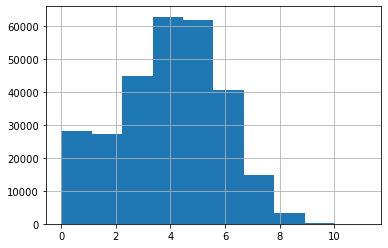

In [63]:
data['Quantity'].hist()